In [1]:
# _*_coding:utf-8_*_

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score


% matplotlib inline

/home/liu/py3venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/liu/py3venv/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/home/liu/py3venv/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationW

In [50]:
data = pd.read_excel('/home/liu/mysoft/pycharm/project/quantist/quantist/example/forex/xauusd.xlsx')
df_train = data[:-100]
df_test = data[-100:]


In [51]:
df_train.dtypes

In [51]:
df_train.shape

In [53]:
df_train.count()

In [54]:
df_train.describe()

,close,open,high,low
count,9538.000000,9538.000000,9538.000000,9538.000000
mean,624.102177,624.233195,627.165974,620.971719
std,412.553173,412.670186,415.408869,409.589492
min,253.000000,252.900000,252.900000,252.500000
25%,349.925000,350.000000,350.800000,349.000000
50%,404.700000,404.500000,406.000000,403.000000
75%,875.350000,873.325000,883.450000,865.700000
max,1888.700000,1909.000000,1911.600000,1864.000000


In [78]:
df_test['month'] = pd.DatetimeIndex(df_test.day).month
df_test['day'] = pd.DatetimeIndex(df_test.day).dayofweek
df_test['hour'] = pd.DatetimeIndex(df_test.day).hour

df_test.head()

/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,day,close,open,high,low,month,hour
9538,2,1287.8,1297.3,1299.2,1284.1,9,0
9539,3,1288.7,1285.1,1291.6,1280.4,9,0
9540,4,1284.8,1290.1,1293.2,1278.2,9,0
9541,0,1275.8,1282.2,1282.8,1272.0,10,0
9542,1,1274.6,1273.1,1277.4,1271.0,10,0


In [56]:
df_train['month'] = pd.DatetimeIndex(df_train.day).month
df_train['day'] = pd.DatetimeIndex(df_train.day).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.day).hour

df_train.head()

/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,day,close,open,high,low,month,hour
0,3,515.5,517.00,517.0,513.00,12,0
1,4,517.8,516.00,517.8,510.40,12,0
2,0,533.0,527.88,534.5,527.88,12,0
3,2,575.5,562.50,577.0,558.00,1,0
4,3,625.0,627.00,640.0,603.00,1,0


In [57]:
df_train_target = df_train['close'].values
df_train_data = df_train['open'].values.reshape(-1,1)
print(df_train_data[:5])
print(df_train_data.shape)
print(df_train_target[:5])
print(df_train_target.shape)
# print(df_train_target.isnull)

[[ 517.  ]
 [ 516.  ]
 [ 527.88]
 [ 562.5 ]
 [ 627.  ]]
(9538, 1)
[ 515.5  517.8  533.   575.5  625. ]
(9538,)


In [57]:



cv = cross_validation.ShuffleSplit(len(df_train_data),n_iter=3,test_size=0.2,random_state=0)

In [74]:
df_train_data[train]

array([[  299.2],
       [  316. ],
       [ 1136.3],
       ..., 
       [  648.6],
       [ 1204.5],
       [  259.6]])

In [75]:
df_train_data[train].reshape(-1,1)

array([[  299.2],
       [  316. ],
       [ 1136.3],
       ..., 
       [  648.6],
       [ 1204.5],
       [  259.6]])

In [77]:
df_train_target[test]

In [76]:
df_train_target[test].reshape(-1,1)

array([[  380.1],
       [  422.7],
       [  292.7],
       ..., 
       [  362.9],
       [ 1210. ],
       [  388.9]])

In [62]:
print(len(df_train_target))

9638


In [64]:


# Ridge

print('Ride')
for train, test in cv:
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(df_train_data[train], df_train_target[train]),
        svc.score(df_train_data[test], df_train_target[test])
    ))
    
print('SVM')
for train,test in cv:
    svc = svm.SVR(kernel='rbf', C=10, gamma=.001).fit(df_train_data[train],df_train_target[train])
    print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(df_train_data[train], df_train_target[train]),
        svc.score(df_train_data[test], df_train_target[test])
    ))

print('Random Forest')
for trian, test in cv:
    svc = RandomForestRegressor(n_estimators=100).fit(df_train_data[train],df_train_target[train])
    print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(df_train_data[train], df_train_target[train]),
        svc.score(df_train_data[test], df_train_target[test])
    ))

Ride
train score:1.000, test score:1.000

train score:1.000, test score:1.000

train score:1.000, test score:1.000

SVM


train score:0.989, test score:0.989



train score:0.989, test score:0.993



train score:0.989, test score:0.990

Random Forest


train score:1.000, test score:1.000



train score:1.000, test score:1.000



train score:1.000, test score:1.000



In [69]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0
)

tuned_parameters = [{'n_estimators':[10, 100, 500]}]

scores = ['r2']

for score in scores:
    print(score)
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters,cv=5, scoring=score)
    clf.fit(X_train, y_train)
    
print('Get the params')
print(clf.best_estimator_)
print('')
for params, mean_score, scores in clf.grid_scores_:
    print('%0.3f (+/-%0.03f) for %r' % (mean_score, scores.std()/2, params))
    
"""
0.852 (+/-0.006) for {'n_estimators': 10}
0.862 (+/-0.005) for {'n_estimators': 100}
0.863 (+/-0.006) for {'n_estimators': 500}
"""

r2


Get the params
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.999 (+/-0.000) for {'n_estimators': 10}
0.999 (+/-0.000) for {'n_estimators': 100}
0.999 (+/-0.000) for {'n_estimators': 500}


"\n0.852 (+/-0.006) for {'n_estimators': 10}\n0.862 (+/-0.005) for {'n_estimators': 100}\n0.863 (+/-0.006) for {'n_estimators': 500}\n"

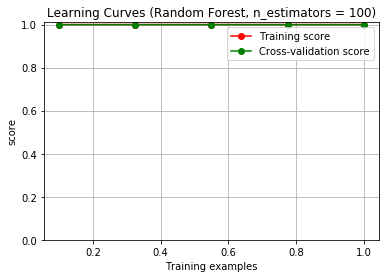

In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('score')
    train_size, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
    
title = 'Learning Curves (Random Forest, n_estimators = 100)'
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10, test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators=100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)
plt.show()

In [73]:
for train, test in cv: 
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

train score: 1.000, test score: 1.000



train score: 1.000, test score: 0.999



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 0.999



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 0.999



train score: 1.000, test score: 1.000



In [18]:
corr = df_train[['open', 'high', 'low', 'close']].corr()
corr

,open,high,low,close
open,1.000000,0.999921,0.999889,0.999837
high,0.999921,1.000000,0.999839,0.999903
low,0.999889,0.999839,1.000000,0.999921
close,0.999837,0.999903,0.999921,1.000000


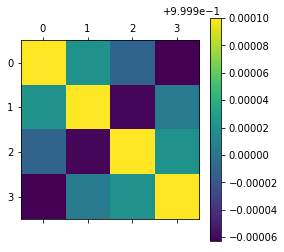

In [19]:
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()

In [20]:
clf.predict()

In [79]:
df_test['month'] = pd.DatetimeIndex(df_test.day).month
df_test['day'] = pd.DatetimeIndex(df_test.day).dayofweek
df_test['hour'] = pd.DatetimeIndex(df_test.day).hour

df_test.head()

/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/liu/py3venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,day,close,open,high,low,month,hour
9538,3,1287.8,1297.3,1299.2,1284.1,1,0
9539,3,1288.7,1285.1,1291.6,1280.4,1,0
9540,3,1284.8,1290.1,1293.2,1278.2,1,0
9541,3,1275.8,1282.2,1282.8,1272.0,1,0
9542,3,1274.6,1273.1,1277.4,1271.0,1,0


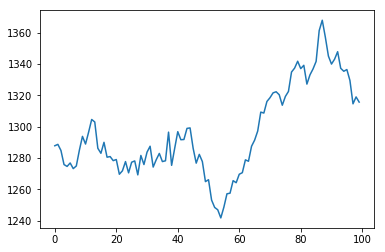

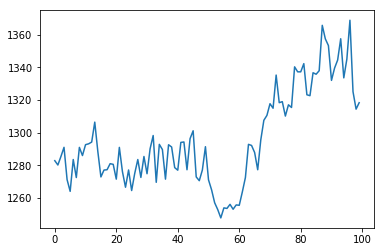

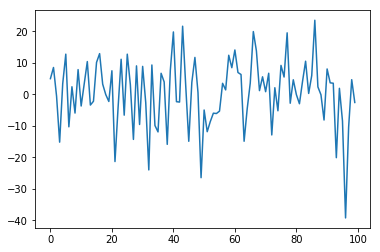

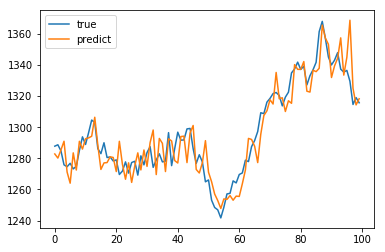

In [94]:
df_test_target = df_test['close'].values
df_test_data = df_test['open'].values.reshape(-1,1)
t = clf.predict(df_test_data )

plt.plot(df_test_target)
plt.figure()
plt.plot(t)
plt.figure()
diff = df_test_target - t
plt.plot(diff)
plt.figure()
plt.plot(df_test_target,label='true')
plt.plot(t,label='predict')
plt.legend(loc='best')

In [110]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier,XGBRegressor
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 4

In [107]:
data = pd.read_excel('/home/liu/mysoft/pycharm/project/quantist/quantist/example/forex/xauusd.xlsx')
df_train = data[:-100]
df_test = data[-100:]

train = df_train
test = df_test

target = 'close'
IDcol = 'day'

train['close'].value_counts()


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f142ef3ae80>>
Traceback (most recent call last):
  File "/home/liu/py3venv/lib/python3.5/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


383.30     17
382.30     15
386.00     14
386.10     14
378.90     13
387.10     13
383.60     13
383.10     13
387.00     13
382.90     13
384.90     13
384.20     13
385.20     12
384.70     12
383.80     12
390.30     11
394.00     11
387.60     11
376.80     11
376.60     11
387.90     11
385.00     10
383.70     10
381.40     10
384.30     10
386.30     10
383.50     10
386.60     10
385.40     10
418.00     10
           ..
471.60      1
1097.90     1
1542.10     1
1034.70     1
1617.90     1
883.70      1
516.60      1
1201.00     1
319.50      1
260.50      1
1161.70     1
1289.65     1
1340.30     1
1692.40     1
528.40      1
505.80      1
1216.80     1
835.50      1
484.50      1
439.50      1
571.00      1
527.60      1
941.00      1
332.60      1
1256.60     1
1278.60     1
1132.60     1
1235.30     1
453.60      1
1131.90     1
Name: close, Length: 4798, dtype: int64

In [108]:
# 建模与交叉验证
# 写一个大的函数完成以下的功能
# 
# 数据建模
# 求训练准确率
# 求训练集AUC
# 根据xgboost交叉验证更新n_estimators
# 画出特征的重要度

def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    # model
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
    
    # predic for test
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    print('accuary %.4g'%metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print('Score_train %f'%metrics.roc_auc_score(dtrain['Disbursed'],dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
        

In [112]:
# 第1步- 对于高的学习率找到最合适的estimators个数
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)
modelfit(xgb1, train, test, predictors)

# 准确率 : 0.9854
# AUC 得分 (训练集): 0.817509

XGBoostError: b'value 0for Parameter num_class should be greater equal to 1'